# DATA SCIENCE

# TASK CODE : DS

# TASK - 05 : Analyze Traffic Data and To Identify Accident Patterns 

# Dataset : US_Accidents_March23.csv

In [1]:
# IMPORT THE LIBRARIES
import pandas as pd
# LOAD THE CSV FILE
df = pd.read_csv('US_Accidents_March23.csv', encoding='ISO-8859-1', low_memory=False)
# SHOWING FIRST 5 ROWS FROM THE DATASETS
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [2]:
# BASIC INFO OF THE DATASETS
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226644 entries, 0 to 226643
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     226644 non-null  object 
 1   Source                 226644 non-null  object 
 2   Severity               226644 non-null  int64  
 3   Start_Time             226644 non-null  object 
 4   End_Time               226644 non-null  object 
 5   Start_Lat              226644 non-null  float64
 6   Start_Lng              226644 non-null  float64
 7   End_Lat                0 non-null       float64
 8   End_Lng                0 non-null       float64
 9   Distance(mi)           226644 non-null  float64
 10  Description            226644 non-null  object 
 11  Street                 226644 non-null  object 
 12  City                   226630 non-null  object 
 13  County                 226644 non-null  object 
 14  State                  226644 non-nu

In [3]:
# CHECKING NULL VALUE
df.isnull().sum()

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  226644
End_Lng                  226644
Distance(mi)                  0
Description                   0
Street                        0
City                         14
County                        0
State                         0
Zipcode                      30
Country                       0
Timezone                     30
Airport_Code                 30
Weather_Timestamp          1701
Temperature(F)             3154
Wind_Chill(F)            200053
Humidity(%)                3567
Pressure(in)               2413
Visibility(mi)             4128
Wind_Direction             1714
Wind_Speed(mph)           42572
Precipitation(in)        204629
Weather_Condition          3545
Amenity                       1
Bump                          1
Crossing

In [4]:
# FILL THE 'Weather.Condition' CATEGORICAL COLUMN BECAUSE IT CONTAIN NULL VALUES
df['Weather_Condition'] = df['Weather_Condition'].fillna('Unknown')

In [6]:
# FILL THOSE COLUMNS WHICH CONTAINS LESS NULL VALUES
binary_cols = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 
               'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 
               'Traffic_Signal', 'Turning_Loop']
df[binary_cols] = df[binary_cols].fillna(False)
df[binary_cols] = df[binary_cols].infer_objects(copy=False)

In [7]:
# CHANGE THE DATATYPES OF COLUMN TO DATETIME
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'], errors='coerce')
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

In [9]:
# FILL THESE COLUMN WITH MODE VALUES
df['City'].fillna('Unknown', inplace=True)
df['Zipcode'].fillna(df['Zipcode'].mode()[0], inplace=True)
df['Timezone'].fillna(df['Timezone'].mode()[0], inplace=True)
df['Airport_Code'].fillna('UNK', inplace=True)

In [10]:
# FILL THE NUMERICAL COLUMNS WITH MEAN VALUES
df['Humidity(%)'] = df['Humidity(%)'].fillna(df['Humidity(%)'].mean())
df['Pressure(in)'] = df['Pressure(in)'].fillna(df['Pressure(in)'].mean())
df['Visibility(mi)'] = df['Visibility(mi)'].fillna(df['Visibility(mi)'].mean())
df['Wind_Speed(mph)'] = df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].median())
df['Precipitation(in)'] = df['Precipitation(in)'].fillna(0)
df['End_Lat'] = df['End_Lat'].fillna(df['Start_Lat'])
df['End_Lng'] = df['End_Lng'].fillna(df['Start_Lng'])

In [11]:
# Handle Wind_Chill(F)
df.drop('Wind_Chill(F)', axis=1, inplace=True)  # or use Temperature(F) if needed

# Fill Wind_Direction
df['Wind_Direction'] = df['Wind_Direction'].fillna(df['Wind_Direction'].mode()[0])

In [12]:
# FILL THESE COLUMN WITH MODE VALUES
df['Sunrise_Sunset'] = df['Sunrise_Sunset'].fillna(df['Sunrise_Sunset'].mode()[0])
df['Civil_Twilight'] = df['Civil_Twilight'].fillna(df['Civil_Twilight'].mode()[0])
df['Nautical_Twilight'] = df['Nautical_Twilight'].fillna(df['Nautical_Twilight'].mode()[0])
df['Astronomical_Twilight'] = df['Astronomical_Twilight'].fillna(df['Astronomical_Twilight'].mode()[0])

In [13]:
df.isnull().sum()

ID                          0
Source                      0
Severity                    0
Start_Time                  0
End_Time                    0
Start_Lat                   0
Start_Lng                   0
End_Lat                     0
End_Lng                     0
Distance(mi)                0
Description                 0
Street                      0
City                        0
County                      0
State                       0
Zipcode                     0
Country                     0
Timezone                    0
Airport_Code                0
Weather_Timestamp        1701
Temperature(F)           3154
Humidity(%)                 0
Pressure(in)                0
Visibility(mi)              0
Wind_Direction              0
Wind_Speed(mph)             0
Precipitation(in)           0
Weather_Condition           0
Amenity                     0
Bump                        0
Crossing                    0
Give_Way                    0
Junction                    0
No_Exit   

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226644 entries, 0 to 226643
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     226644 non-null  object        
 1   Source                 226644 non-null  object        
 2   Severity               226644 non-null  int64         
 3   Start_Time             226644 non-null  datetime64[ns]
 4   End_Time               226644 non-null  datetime64[ns]
 5   Start_Lat              226644 non-null  float64       
 6   Start_Lng              226644 non-null  float64       
 7   End_Lat                226644 non-null  float64       
 8   End_Lng                226644 non-null  float64       
 9   Distance(mi)           226644 non-null  float64       
 10  Description            226644 non-null  object        
 11  Street                 226644 non-null  object        
 12  City                   226644 non-null  obje

# NOW DATA IS READY TO DO SOME ANALYSIS

# 1. Correlation Heatmap between road features and accident severity.

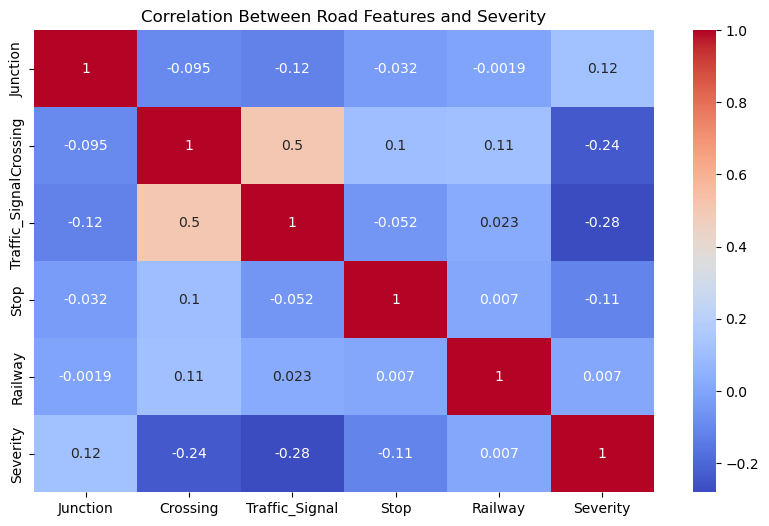

In [15]:
# IMPORT LIBRARIES
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
binary_cols = ['Junction', 'Crossing', 'Traffic_Signal', 'Stop', 'Railway']
sns.heatmap(df[binary_cols + ['Severity']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Road Features and Severity')
plt.show()


# 2.ROAD FEATURES CAUSES ACCIDENTS

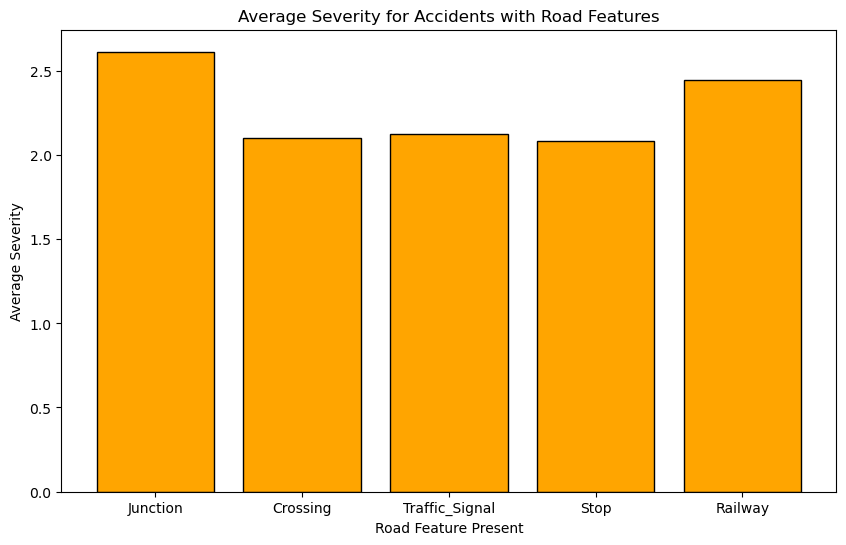

In [16]:
# IMPORT LIBRARIES
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
binary_cols = ['Junction', 'Crossing', 'Traffic_Signal', 'Stop', 'Railway']

# Calculate average severity for each road feature
avg_severity = {col: df.groupby(col)['Severity'].mean()[True] for col in binary_cols}

plt.bar(avg_severity.keys(), avg_severity.values(), color='orange', edgecolor='black')
plt.title('Average Severity for Accidents with Road Features')
plt.ylabel('Average Severity')
plt.xlabel('Road Feature Present')
plt.show()

# 3.Time of Day & Accident Trends

In [17]:
# EXTRACTING HOURS, DAY, WEEK,, MONTH FROM START_TIME
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.dayofweek
df['Week'] = df['Start_Time'].dt.isocalendar().week
df['Month'] = df['Start_Time'].dt.month

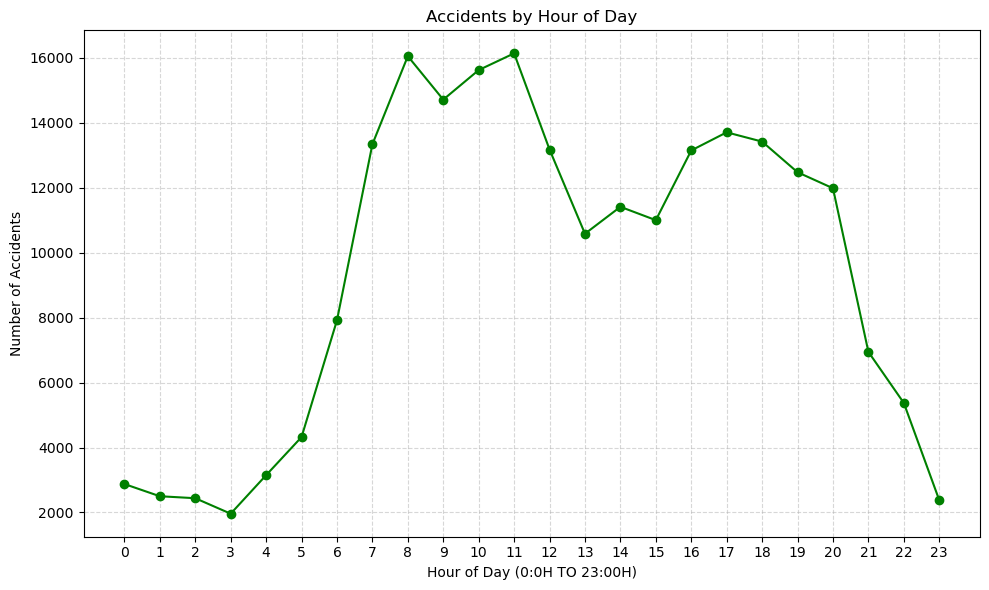

In [57]:
# Hourly Accident Pattern

# IMPORT LIBRARIES
import matplotlib.pyplot as plt
# Count of accidents by hour
hourly_counts = df['Hour'].value_counts().sort_index()

# Plot using plt
plt.figure(figsize=(10, 6))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o', linestyle='-', color='GREEN')

plt.title('Accidents by Hour of Day')
plt.xlabel('Hour of Day (0:0H TO 23:00H)')
plt.ylabel('Number of Accidents')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(range(0, 24))  
plt.tight_layout()
plt.show()

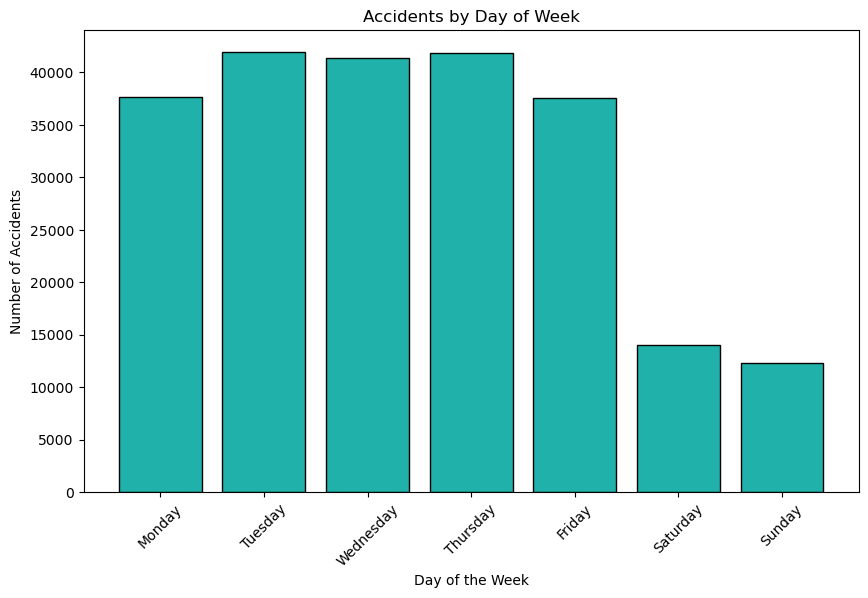

In [18]:
# Weekday Pattern:
import matplotlib.pyplot as plt

# Make sure 'DayOfWeek' contains weekday names
df['DayOfWeek'] = df['Start_Time'].dt.day_name()

# Count and reindex to order days properly
weekday_counts = df['DayOfWeek'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)


plt.figure(figsize=(10, 6))
plt.bar(weekday_counts.index, weekday_counts.values, color='lightseagreen', edgecolor='black')

plt.title('Accidents by Day of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# 4.Weather Conditions & Accidents

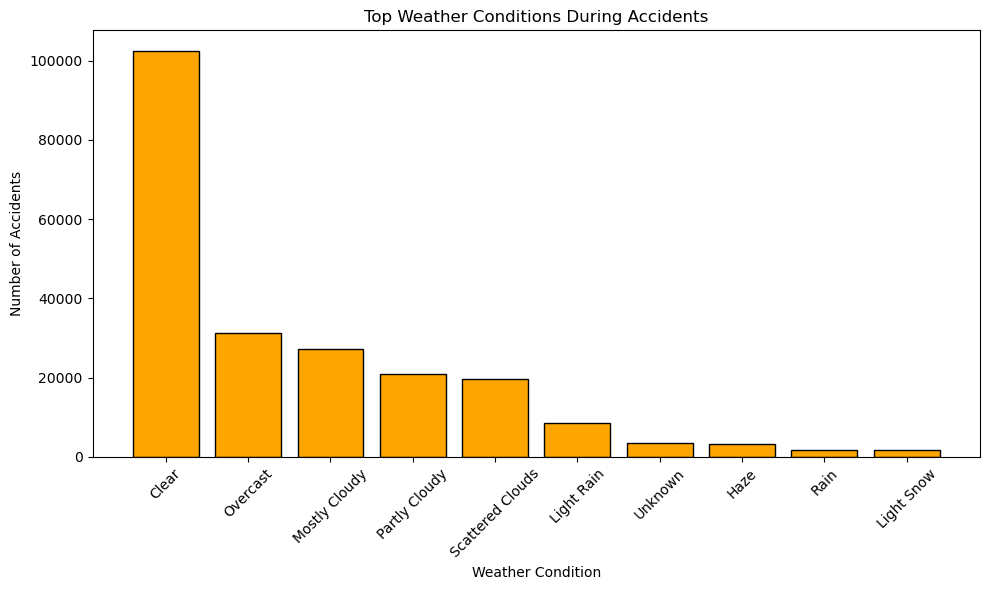

In [19]:
#Weather Conditions & Accidents
import matplotlib.pyplot as plt

# Get top 10 weather conditions
top_weather = df['Weather_Condition'].value_counts().head(10)


plt.figure(figsize=(10, 6))
plt.bar(top_weather.index, top_weather.values, color='ORANGE', edgecolor='black')
plt.title('Top Weather Conditions During Accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

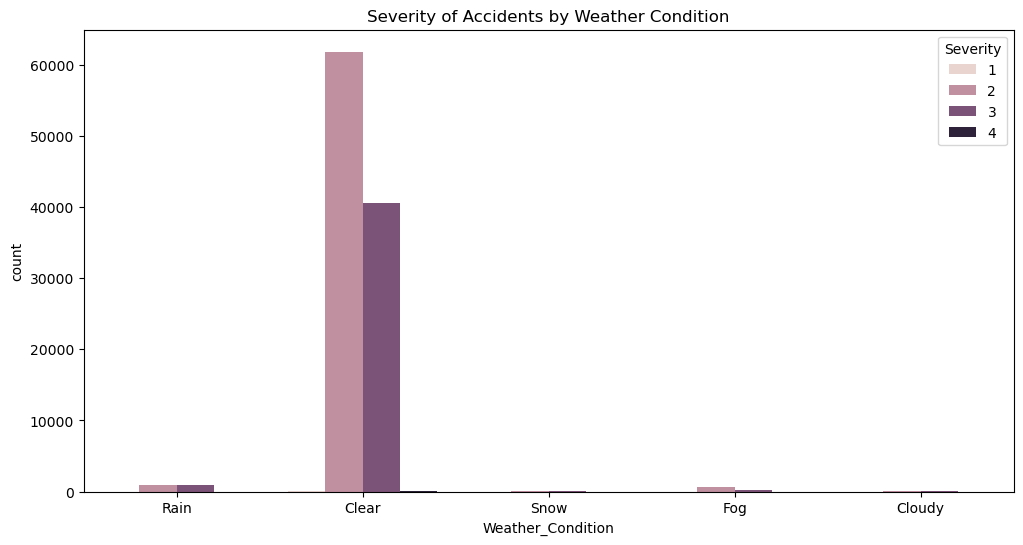

In [64]:
# Severity by Weather:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.countplot(data=df[df['Weather_Condition'].isin(['Clear', 'Rain', 'Fog', 'Snow', 'Cloudy'])],
              x='Weather_Condition', hue='Severity')
plt.title("Severity of Accidents by Weather Condition")
plt.show()

# 5. Accident Hotspots (Location-based Analysis)

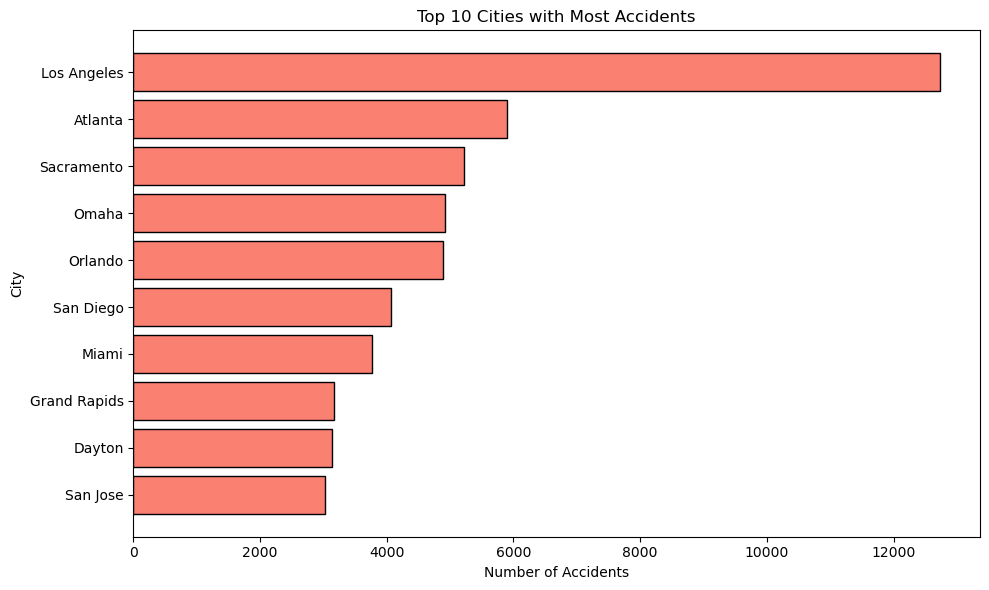

In [20]:
import matplotlib.pyplot as plt

# Top 10 cities
top_cities = df['City'].value_counts().head(10)

# Reverse the order for top-to-bottom display
top_cities = top_cities[::-1]

plt.figure(figsize=(10, 6))
plt.barh(top_cities.index, top_cities.values, color='salmon', edgecolor='black')
plt.title('Top 10 Cities with Most Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('City')
plt.tight_layout()
plt.show()